In [1]:
import math, itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def import_txt_data(filename: str):
    with open(filename, "r") as file:
        contents = file.readlines()

    data = [list(map(float, line.removesuffix("\n").split(","))) for line in contents]
    return np.array(data)

In [3]:
training_set_file = "houses.txt"
data = import_txt_data(training_set_file)

print(data)

[[9.52000e+02 2.00000e+00 1.00000e+00 6.50000e+01 2.71500e+02]
 [1.24400e+03 3.00000e+00 1.00000e+00 6.40000e+01 3.00000e+02]
 [1.94700e+03 3.00000e+00 2.00000e+00 1.70000e+01 5.09800e+02]
 [1.72500e+03 3.00000e+00 2.00000e+00 4.20000e+01 3.94000e+02]
 [1.95900e+03 3.00000e+00 2.00000e+00 1.50000e+01 5.40000e+02]
 [1.31400e+03 2.00000e+00 1.00000e+00 1.40000e+01 4.15000e+02]
 [8.64000e+02 2.00000e+00 1.00000e+00 6.60000e+01 2.30000e+02]
 [1.83600e+03 3.00000e+00 1.00000e+00 1.70000e+01 5.60000e+02]
 [1.02600e+03 3.00000e+00 1.00000e+00 4.30000e+01 2.94000e+02]
 [3.19400e+03 4.00000e+00 2.00000e+00 8.70000e+01 7.18200e+02]
 [7.88000e+02 2.00000e+00 1.00000e+00 8.00000e+01 2.00000e+02]
 [1.20000e+03 2.00000e+00 2.00000e+00 1.70000e+01 3.02000e+02]
 [1.55700e+03 2.00000e+00 1.00000e+00 1.80000e+01 4.68000e+02]
 [1.43000e+03 3.00000e+00 1.00000e+00 2.00000e+01 3.74200e+02]
 [1.22000e+03 2.00000e+00 1.00000e+00 1.50000e+01 3.88000e+02]
 [1.09200e+03 2.00000e+00 1.00000e+00 6.40000e+01 2.820

In [109]:
X_train = data[:, :-1]
y_train = data[:, -1]

features = ["Size (sq. ft.)", "Bedrooms", "Floors", "Age (yrs.)"]
target = "Price (1000 $)"

print(X_train)
print(y_train)

[[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.314e+03 2.000e+00 1.000e+00 1.400e+01]
 [8.640e+02 2.000e+00 1.000e+00 6.600e+01]
 [1.836e+03 3.000e+00 1.000e+00 1.700e+01]
 [1.026e+03 3.000e+00 1.000e+00 4.300e+01]
 [3.194e+03 4.000e+00 2.000e+00 8.700e+01]
 [7.880e+02 2.000e+00 1.000e+00 8.000e+01]
 [1.200e+03 2.000e+00 2.000e+00 1.700e+01]
 [1.557e+03 2.000e+00 1.000e+00 1.800e+01]
 [1.430e+03 3.000e+00 1.000e+00 2.000e+01]
 [1.220e+03 2.000e+00 1.000e+00 1.500e+01]
 [1.092e+03 2.000e+00 1.000e+00 6.400e+01]
 [8.480e+02 1.000e+00 1.000e+00 1.700e+01]
 [1.682e+03 3.000e+00 2.000e+00 2.300e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.040e+03 3.000e+00 1.000e+00 4.400e+01]
 [1.652e+03 2.000e+00 1.000e+00 2.100e+01]
 [1.088e+03 2.000e+00 1.000e+00 3.500e+01]
 [1.316e+03 3.000e+00 1.000e+00 1.400e+01]
 [1.593e+03

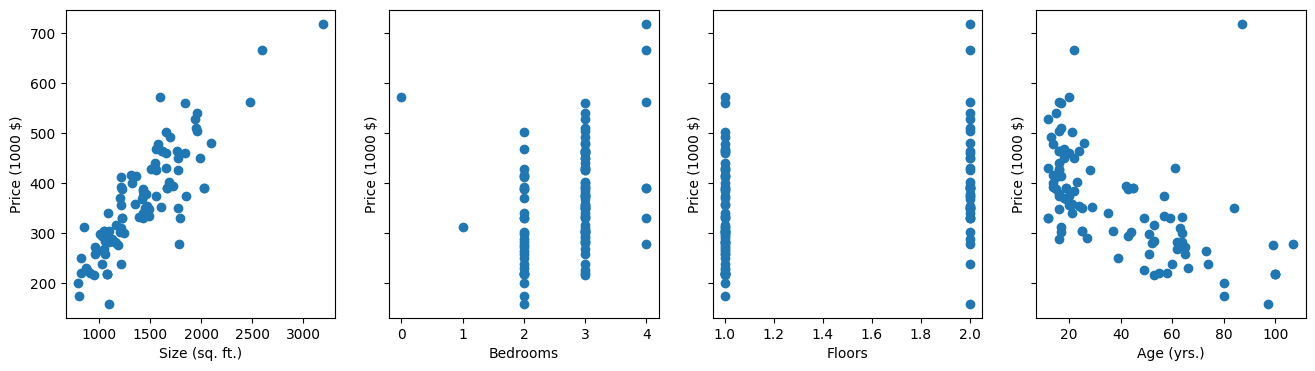

In [5]:
def plot_target_vs_features(X_matrix, y_set):
    n = X_matrix.shape[1]

    fig, subplots = plt.subplots(1, n, figsize = (n * n, n), sharey = True)
    for feature_index, subplot in enumerate(subplots):
        subplot.scatter(X_matrix[:, feature_index], y_set)
        subplot.set_xlabel(features[feature_index])
        subplot.set_ylabel(target)

    plt.show()

plot_target_vs_features(X_train, y_train)

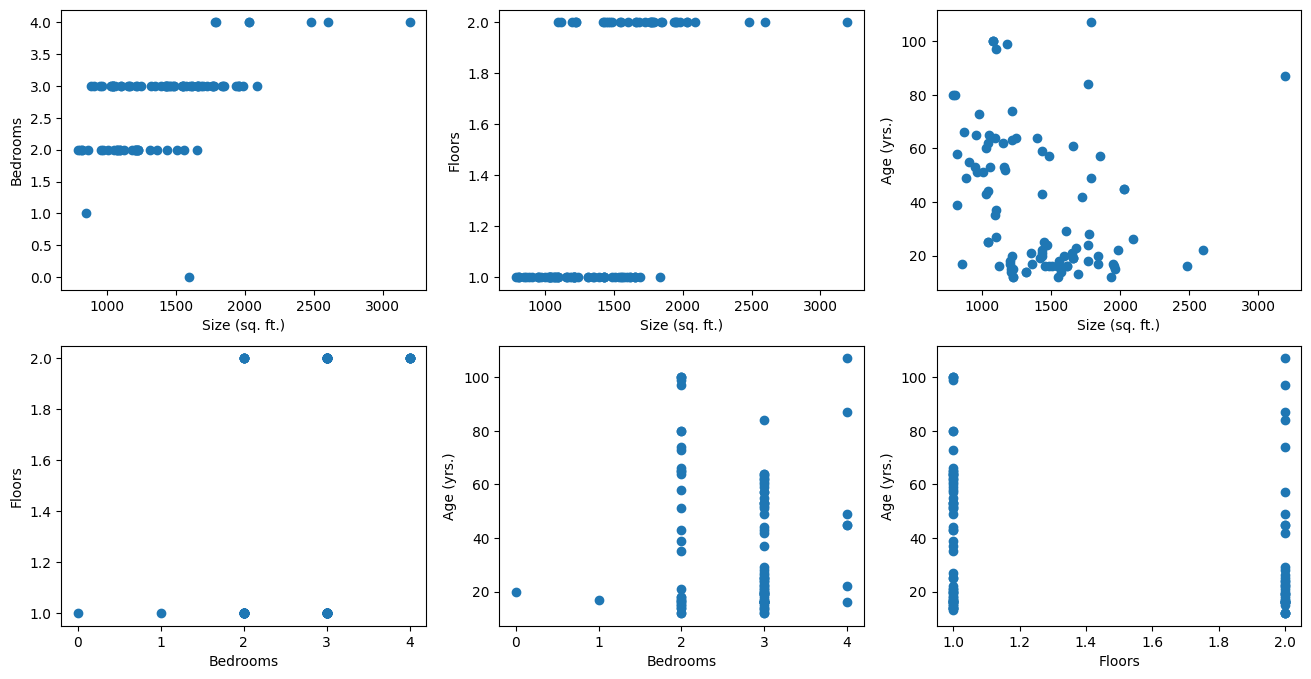

In [106]:
def plot_features_vs_features(X_matrix, feature_names):
    n = X_matrix.shape[1]

    combinations = list(itertools.combinations(np.arange(n), 2))
    fig, subplots = plt.subplots(2, len(combinations)//2, figsize = (n*n, n*n/2))
    subplots = subplots.flatten()

    for feature_index, subplot in enumerate(subplots):
        x_feature_index = combinations[feature_index][0]
        y_feature_index = combinations[feature_index][1]

        subplot.scatter(X_matrix[:, x_feature_index], X_matrix[:, y_feature_index])
        subplot.set_xlabel(feature_names[x_feature_index])
        subplot.set_ylabel(feature_names[y_feature_index])

    plt.show()

plot_features_vs_features(X_train, features)

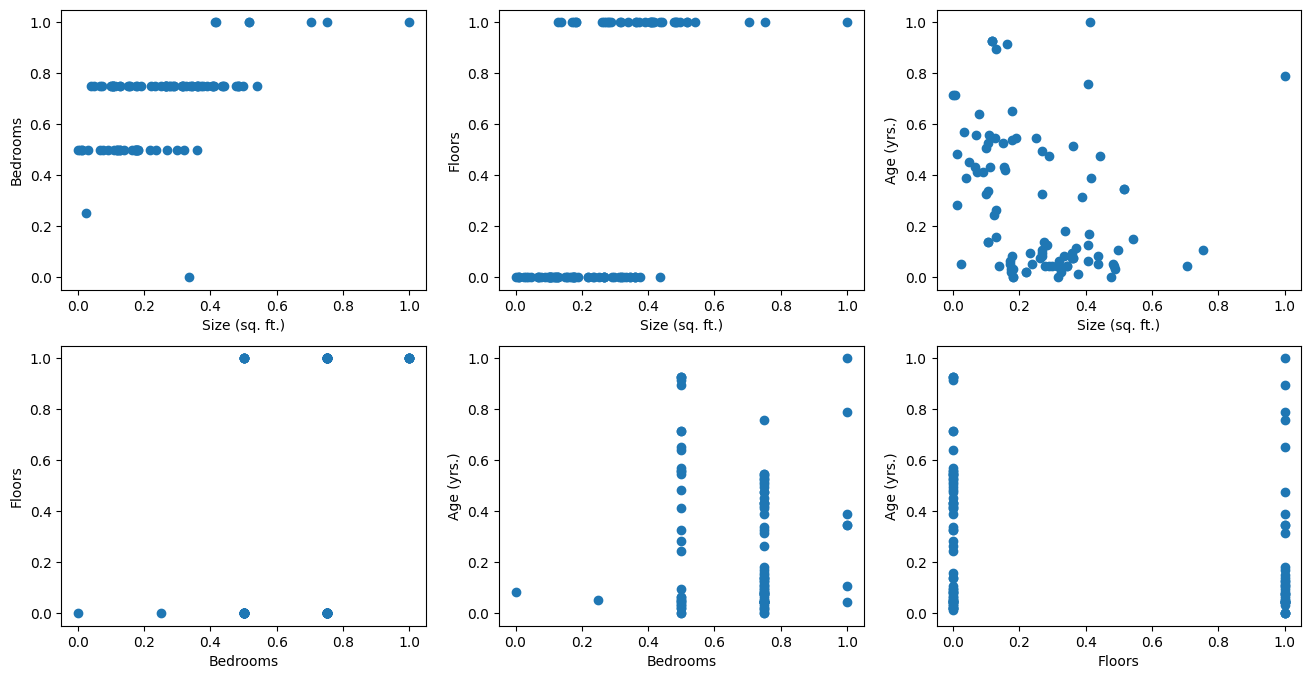

In [7]:
def min_max_normalization(X_matrix):
    features_min = np.min(X_matrix, axis = 0)
    features_range = np.max(X_matrix, axis = 0) - features_min

    normalized_X_matrix = (X_matrix - features_min) / features_range
    return normalized_X_matrix

plot_features_vs_features(min_max_normalization(X_train), features)

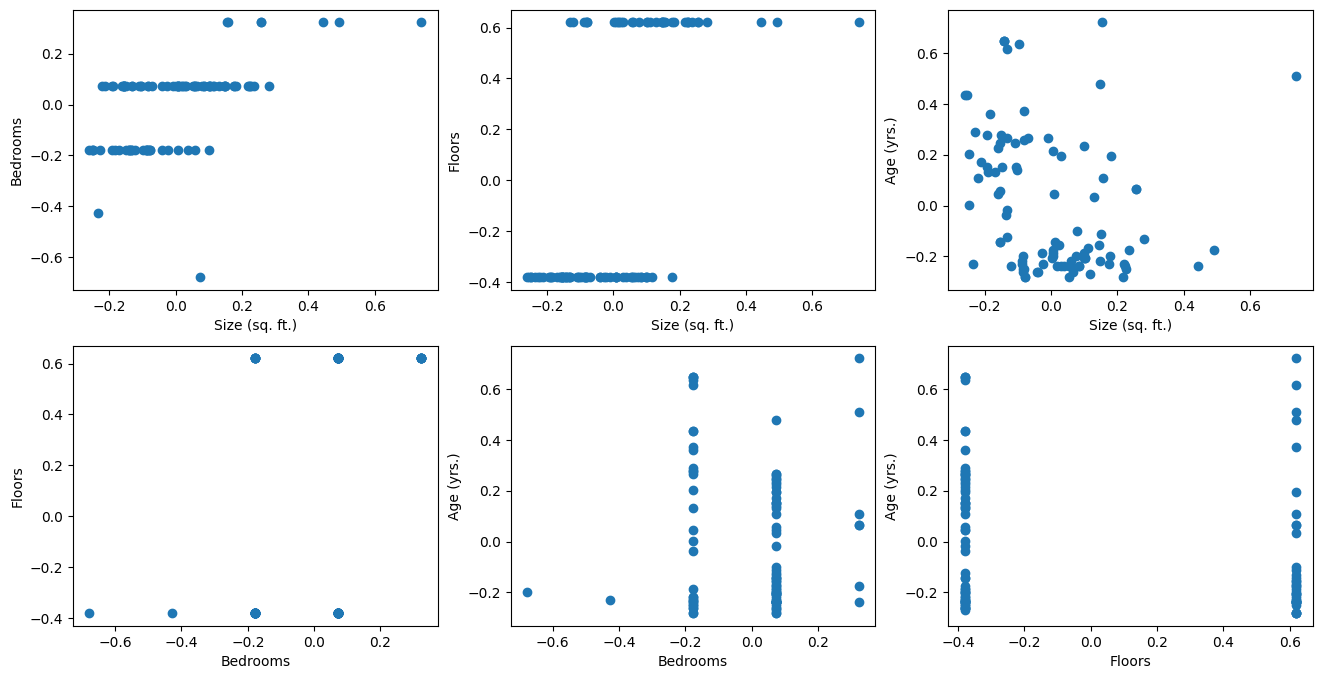

In [8]:
def mean_normalization(X_matrix):
    features_mean = np.mean(X_matrix, axis = 0)
    features_range = np.ptp(X_matrix, axis = 0)

    normalized_X_matrix = (X_matrix - features_mean) / features_range
    return normalized_X_matrix

plot_features_vs_features(mean_normalization(X_train), features)

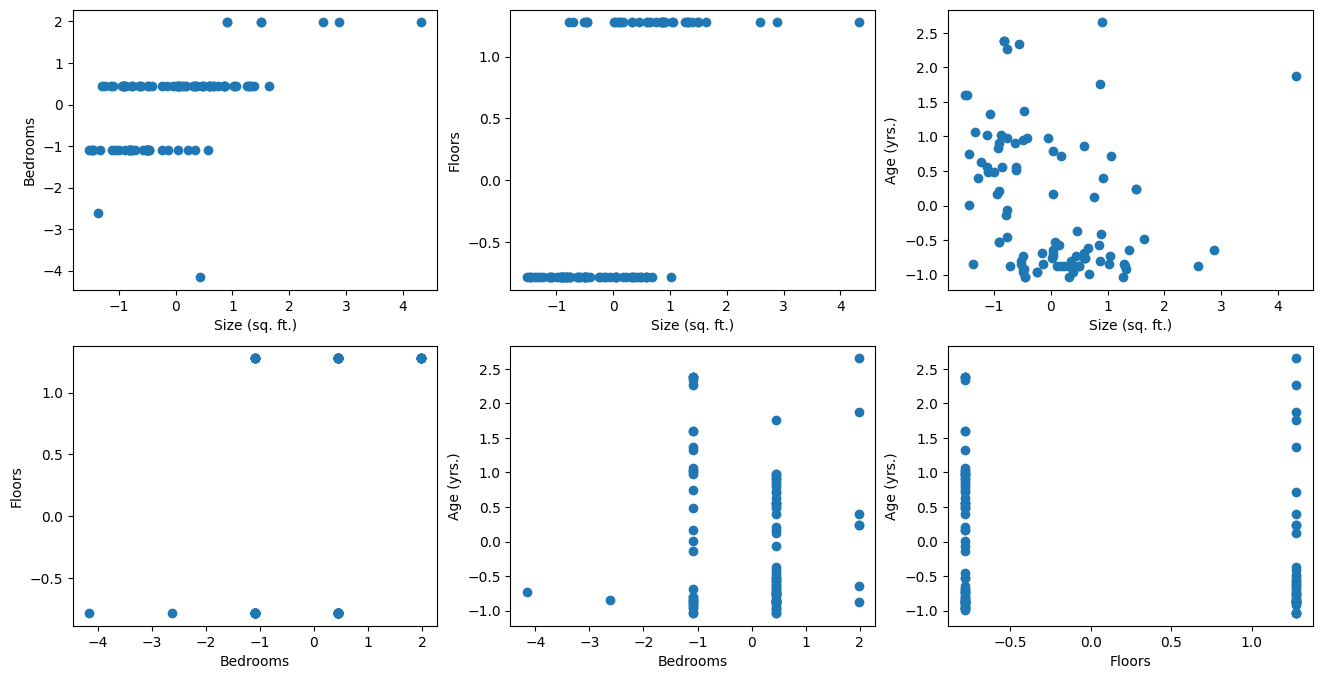

In [9]:
def z_score_normalization(X_matrix):
    features_mean = np.mean(X_matrix, axis = 0)
    features_std_dev = np.std(X_matrix, axis = 0)

    normalized_X_matrix = (X_matrix - features_mean) / features_std_dev
    return normalized_X_matrix

plot_features_vs_features(z_score_normalization(X_train), features)

In [101]:
# Not used anywhere!
def linear_regression_model(X_set, W_set, b):
    return np.dot(W_set, X_set) + b

In [100]:
def get_errors(X_matrix, y_set, W_set, b):
    prediction_set = X_matrix @ W_set + b
    return prediction_set - y_set

In [12]:
def calculate_cost(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]
    
    errors = get_errors(X_matrix, y_set, W_set, b)
    squared_errors = np.square(errors)
    total_cost = np.sum(squared_errors)
    normalized_cost = total_cost / (2 * m)

    return normalized_cost    

In [105]:
def calculate_gradient(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]
    errors = get_errors(X_matrix, y_set, W_set, b)

    dj_dW = (X_matrix.T @ errors) / m
    dj_db = np.sum(errors) / m
    return dj_dW, dj_db

In [89]:
def gradient_descent(X_matrix, y_set, W_set, b, alpha, num_iters):
    iteration_history = [0]
    cost_history = [calculate_cost(X_matrix, y_set, W_set, b)]

    for iteration in range(num_iters):
        dj_dW, dj_db = calculate_gradient(X_matrix, y_set, W_set, b)

        W_set = W_set - alpha * dj_dW
        b = b - alpha * dj_db

        if (iteration + 1) % (num_iters/100) == 0:
            iteration_history.append(iteration + 1)
            cost_history.append(calculate_cost(X_matrix, y_set, W_set, b))
            print(f"{iteration + 1} {W_set} {b} {dj_dW} {dj_db} {cost_history[-1]}")

    return W_set, b, iteration_history, cost_history

In [97]:
initial_W_set = np.array([110.61335173, -21.47323884, -32.66070323, -37.77938362])
initial_b = 362.23951999999997

learning_rate = 0.3
num_iters = 10000

100 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
200 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
300 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
400 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
500 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
600 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9900 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206
10000 [110.61335173 -21.47323884 -32.66070323 -37.77938362] 362.23951999999997 [-2.26485497e-14  5.11590770e-15  8.64197602e-15 -3.96127575e-15] -5.0590642786119134e-14 219.71130176496206


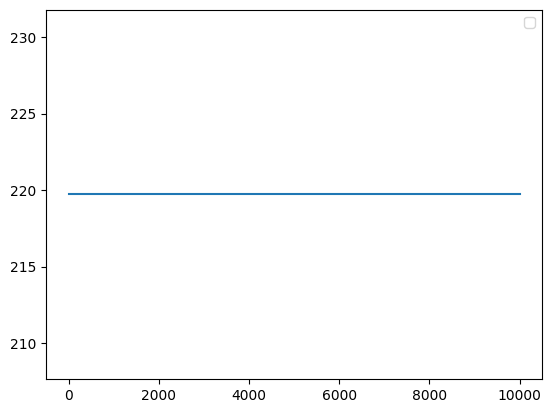

In [99]:
normalized_X_train = z_score_normalization(X_train)
final_W_set, final_b, iteration_history, cost_history = gradient_descent(normalized_X_train, y_train, initial_W_set, initial_b, learning_rate, num_iters)

plt.plot(iteration_history, cost_history)
plt.legend()
plt.show()

In [ ]:
def learning_curve(X_matrix, y_set, initial_W_set, initial_b, alpha, num_iters):
    subplot = plt.subplot(1, 1, 1)

    plot_iterations = 0
    prev_alpha = alpha

    W_set_history, b_history, min_cost_history, alpha_history = [], [], [], []
    while True:
        if plot_iterations != 0:
            if plot_iterations % 2 == 0:
                alpha = prev_alpha * 10
                prev_alpha = alpha
            else:
                alpha = prev_alpha * 3
                
        W_set, b, iter_history, cost_history = gradient_descent(X_matrix, y_set, initial_W_set, initial_b, alpha, num_iters)

        if np.isnan(np.sum(W_set)) or np.isnan(b) or np.isnan(np.sum(cost_history[-1])):
            break

        print(f"Iteration {plot_iterations + 1}   Alpha: {alpha}, Minimum Cost Reached: {cost_history[-1]}")

        W_set_history.append(W_set)
        b_history.append(b)
        min_cost_history.append(cost_history[-1])
        alpha_history.append(alpha)

        subplot.plot(iter_history, cost_history, label = f"LR: {alpha:0.1e}")
        plot_iterations += 1

    plt.legend()
    plt.show()
    return W_set_history, b_history, min_cost_history, alpha_history, plot_iterations

Iteration 1   Alpha: 1e-05, Minimum Cost Reached: 57992.8991543955
Iteration 2   Alpha: 3.0000000000000004e-05, Minimum Cost Reached: 38905.85437988119
Iteration 3   Alpha: 0.0001, Minimum Cost Reached: 10204.515388864336
Iteration 4   Alpha: 0.00030000000000000003, Minimum Cost Reached: 635.2146853996899
Iteration 5   Alpha: 0.001, Minimum Cost Reached: 222.12144667966732
Iteration 6   Alpha: 0.003, Minimum Cost Reached: 219.71130602552682
Iteration 7   Alpha: 0.01, Minimum Cost Reached: 219.7113017649619
Iteration 8   Alpha: 0.03, Minimum Cost Reached: 219.711301764962
Iteration 9   Alpha: 0.1, Minimum Cost Reached: 219.71130176496206
Iteration 10   Alpha: 0.30000000000000004, Minimum Cost Reached: 219.71130176496206


C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_21276\2529081710.py:5: RuntimeWarning: overflow encountered in square
  squared_errors = np.square(errors)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_21276\2922474545.py:5: RuntimeWarning: overflow encountered in matmul
  dj_dw = (errors @ X_matrix) / m
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_21276\2922474545.py:5: RuntimeWarning: invalid value encountered in matmul
  dj_dw = (errors @ X_matrix) / m
C:\Users\Kanwarveer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_21276\1544124762.py:8: RuntimeWarning: invalid value encountered in subtract
  W_set = W_set - alpha * dj_dW


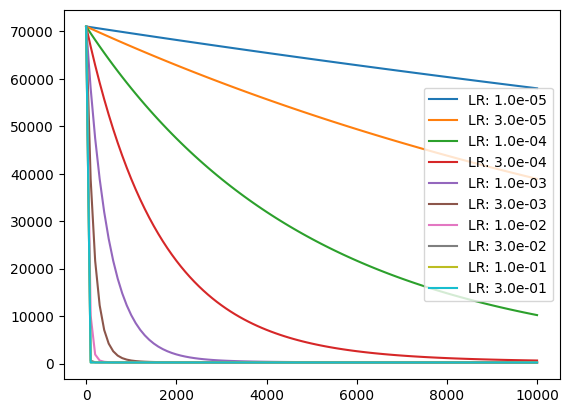

In [83]:
W_set_history, b_history, min_cost_history, alpha_history, plot_iterations = learning_curve(z_score_normalization(X_train), y_train, initial_W_set, initial_b, learning_rate, num_iters)